In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

In [40]:
arq = "/cutsex2.csv"
borges = pd.read_csv("borges"+arq)
canneti = pd.read_csv("canneti"+arq)
braz = pd.read_csv("braz_2017" + arq)
oliveira = pd.read_csv("oliveira" + arq)
display(borges.head())
display(canneti.head())
display(braz.head())
display(oliveira.head())

,cut
0,3201.0
1,5341.0
2,2892.0
3,28772.0


,cut
0,3201.0
1,5341.0
2,3346.0
3,34487.0


,cut
0,3201.0
1,5637.0
2,3299.0
3,36014.0


,cut
0,3201.0
1,5940.0
2,13243.0
3,150784.0


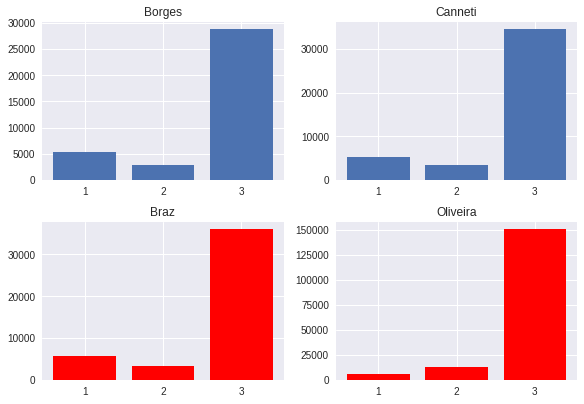

In [41]:
fig, ax = plt.subplots(2,2, constrained_layout=True)

ax[0][0].bar([1,2,3], borges.cut.values[1:])
ax[0][0].set_title("Borges")
ax[0][0].set_xticks([1, 2, 3])

ax[0][1].bar([1,2,3], canneti.cut.values[1:])
ax[0][1].set_title("Canneti")
ax[0][1].set_xticks([1, 2, 3])

ax[1][0].bar([1,2,3], braz.cut.values[1:], color="red")
ax[1][0].set_title("Braz")
ax[1][0].set_xticks([1, 2, 3])

ax[1][1].bar([1,2,3], oliveira.cut.values[1:], color= "red")
ax[1][1].set_title("Oliveira")
ax[1][1].set_xticks([1, 2,3])
print

plt.savefig("arv_corte2", dpi=300)
plt.show()

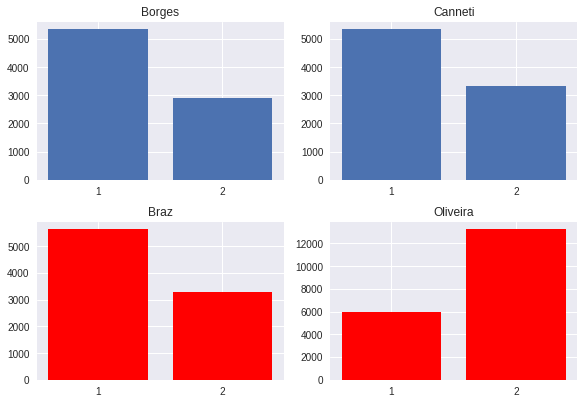

In [43]:
fig, ax = plt.subplots(2,2, constrained_layout=True)

ax[0][0].bar([1,2], borges.cut.values[1:-1])
ax[0][0].set_title("Borges")
ax[0][0].set_xticks([1, 2])

ax[0][1].bar([1,2], canneti.cut.values[1:-1])
ax[0][1].set_title("Canneti")
ax[0][1].set_xticks([1, 2])

ax[1][0].bar([1,2], braz.cut.values[1:-1], color="red")
ax[1][0].set_title("Braz")
ax[1][0].set_xticks([1, 2])

ax[1][1].bar([1,2], oliveira.cut.values[1:-1], color= "red")
ax[1][1].set_title("Oliveira")
ax[1][1].set_xticks([1, 2])

plt.savefig("arv_corte_ajs2", dpi=300)
plt.show()

In [17]:
brazc = pd.read_csv("braz_2014/cutscex2.csv")
castro = pd.read_csv("castro/cutscex2.csv")
display(brazc)
display(castro)

,cut
0,3218.0
1,4860.0
2,1545.0
3,260.0
4,210361.0


,cut
0,3218.0
1,3218.0
2,2001.0
3,1193.0
4,5.0


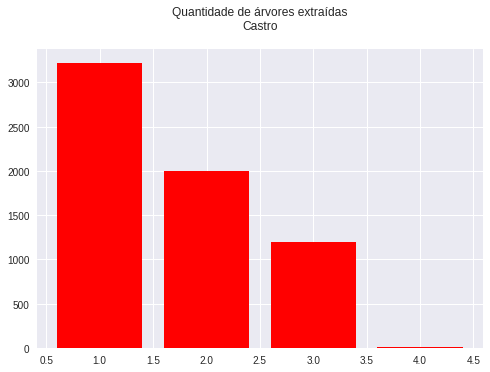

In [33]:

plt.bar([1,2,3,4], castro.cut.values[1:], color="red")
plt.title("Quantidade de árvores extraídas\nCastro\n")
plt.savefig("castro/extracts")
plt.show()

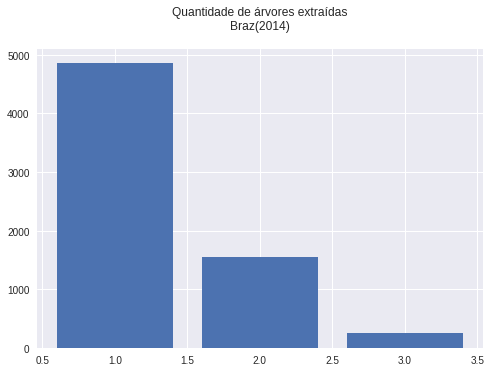

In [31]:
plt.bar([1,2,3], brazc.cut[1:-1])
plt.title("Quantidade de árvores extraídas\nBraz(2014)\n")
plt.savefig("braz_2014/extracts")
plt.show()